<a href="https://colab.research.google.com/github/Kanika211/Netflix-movies-and-TV-shows-clustering/blob/main/Netflix_movies_and_tv_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features


## **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genre

12. description: The Summary description

##**IMPORTING THE LIBRARIES**

In [1]:
#importing necessary libraries for the dataset analysis
import numpy as np                                            # Computation on datasets
import pandas as pd                                           # Data processing, analysing and wrangling
import matplotlib.pyplot as plt                               # Data visualization --plotting
import matplotlib.image as mpimg                              # Data visualization --images
%matplotlib inline                                            
import seaborn as sns                                         # Data visualization --plotting
import collections

#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mount the drive to load the dataset 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read the dataset to start analyzing
file_path ='/content/drive/MyDrive/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv'
netflix_df=pd.read_csv(file_path)

In [4]:
#Top 5 records of the dataset
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
#Bottom 5 records of the dataset
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
#Number of rows and columns of the dataset
netflix_df.shape

(7787, 12)

In [7]:
#Name of the columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
#Details of the columns of the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


##  **HANDLING NULLS AND DUPLICATES**




In [9]:
#Checking the number of duplicates in the dataset
len(netflix_df[netflix_df.duplicated( keep='first')])

0

In [10]:
#Find the number of columns with null value for each column
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
#Display the number of unique values for each of the column
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [12]:
#Display the two types of netflix records
netflix_df.type.unique()

array(['TV Show', 'Movie'], dtype=object)

In [13]:
#Display the unique ratings available in the dataset
netflix_df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
#Check for duplicates
netflix_df.duplicated().sum()

0

In [15]:
#Copying the original dataset to a backup copy before making changes to the dataset
netflix_original = netflix_df.copy()

In [16]:
# Replacing the values where the director is null with appropriate strings
netflix_df["director"] = netflix_df["director"].fillna("")
netflix_df["cast"] = netflix_df["cast"].fillna("")
netflix_df["country"] = netflix_df["country"].fillna("United States")
netflix_df["date_added"] = netflix_df["date_added"].fillna("")

In [17]:
#Find the number of columns with null value for each column after making above changes
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          7
duration        0
listed_in       0
description     0
dtype: int64

Here , all the null value columns were filled with empty string for further analysis except for the country column. As, United States is the top producers of the netflix shows and movies, these empty columns were filled with 'United States' for country.

## **DATA EXTRACTION**

In [18]:
# Parsing out the year and month of a a tv series and movies based on the date provided 
netflix_df ['date_added'] = pd.to_datetime(netflix_df['date_added'])
netflix_df ['year_added'] = netflix_df['date_added'].dt.year
netflix_df ['month_added'] = netflix_df['date_added'].dt.month

# Seperating movies from tv series, and tv series that had one, two, or more seasons 
netflix_df['season_count'] = netflix_df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
netflix_df['duration'] = netflix_df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [19]:
#Type column count for each category
netflix_df["type"].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

Text(0.5, 1.0, 'Type')

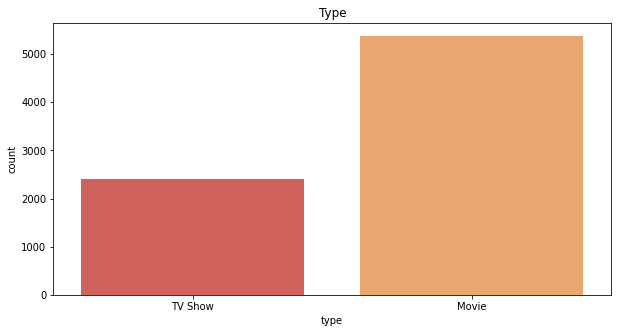

In [20]:
#Analysis on Type column
sns.set_palette("Spectral")
plt.figure(figsize=(10,5))
sns.countplot(netflix_df['type'])
plt.title('Type')

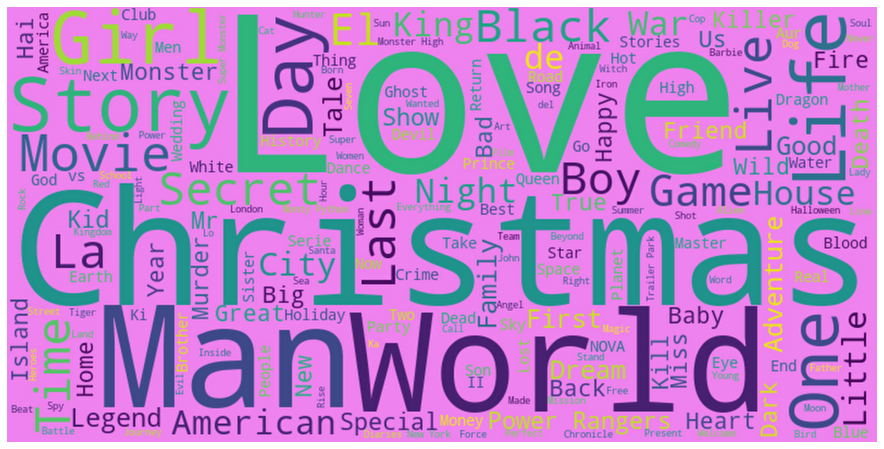

In [21]:
#Analysis on title column
plt.figure(figsize= (16, 8))
title_words = " ".join(word for word in netflix_df['title'])
stopwords = set(STOPWORDS)

# Generate a word cloud image with most used titles
title_cloud = WordCloud(stopwords=stopwords, background_color="violet",width=800, height=400).generate(title_words)
plt.imshow(title_cloud, interpolation='bessel')
plt.axis("off")
plt.show()

**Love, Christmas, World and Man** are the most utilized words for movie titles.

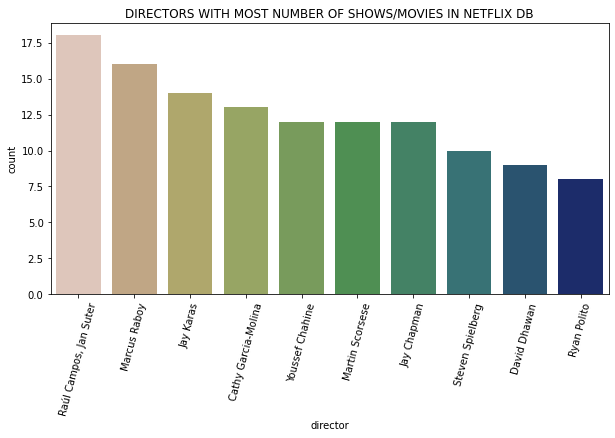

In [22]:
#analysis on director column
plt.figure(figsize = (10,5))

#excluding the missing information 
netflix_directors =netflix_df[netflix_df['director'] != '']
sns.countplot(x='director',data=netflix_directors,order=netflix_directors.director.value_counts().head(10).index,palette='gist_earth_r')
plt.title('DIRECTORS WITH MOST NUMBER OF SHOWS/MOVIES IN NETFLIX DB')
plt.xticks(rotation = 75)
plt.show()

Above graph shows the director with most number of productions in our netflix dataset.

## **DATA VISUALIZATION**

In [23]:
#analysis on cast column
#excluding the missing information 
netflix_cast =netflix_df[netflix_df['cast'] != '']
netflix_cast["cast"].value_counts()

David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin Hart                                                                                                                                                                     6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                                         6
                                                                                                                   

As we can see above, the cast details include the main actors of each movie or show.So each record can contain one or more actors. We have to put this information to another list to see which actor has the most number of shows/movies listed in this dataset

In [24]:
#Moving each entry to a new list
cast_list = list(netflix_cast['cast'])

#Moving the actor names as separate elements in the list 
cast_list_new =[x for xs in cast_list for x in xs.split(',')]

#Making a dictionary with the above list with the number of times the actors name appears in the dataset as the key
cast_list_count = collections.Counter(cast_list_new)
cast_list_count

Counter({'João Miguel': 1,
         ' Bianca Comparato': 2,
         ' Michel Gomes': 1,
         ' Rodolfo Valente': 1,
         ' Vaneza Oliveira': 1,
         ' Rafael Lozano': 1,
         ' Viviane Porto': 1,
         ' Mel Fronckowiak': 1,
         ' Sergio Mamberti': 1,
         ' Zezé Motta': 1,
         ' Celso Frateschi': 1,
         'Demián Bichir': 2,
         ' Héctor Bonilla': 1,
         ' Oscar Serrano': 1,
         ' Azalia Ortiz': 1,
         ' Octavio Michel': 1,
         ' Carmen Beato': 3,
         'Tedd Chan': 1,
         ' Stella Chung': 1,
         ' Henley Hii': 5,
         ' Lawrence Koh': 1,
         ' Tommy Kuan': 1,
         ' Josh Lai': 1,
         ' Mark Lee': 2,
         ' Susan Leong': 2,
         ' Benjamin Lim': 1,
         'Elijah Wood': 3,
         ' John C. Reilly': 9,
         ' Jennifer Connelly': 1,
         ' Christopher Plummer': 8,
         ' Crispin Glover': 6,
         ' Martin Landau': 4,
         ' Fred Tatasciore': 17,
         ' Alan Opp

In [25]:
#Changing the dictionary to a dataframe
cast_list_count = pd.DataFrame.from_dict(cast_list_count, orient='index', columns=['count'])
cast_list_count

,count
João Miguel,1
Bianca Comparato,2
Michel Gomes,1
Rodolfo Valente,1
Vaneza Oliveira,1
...,...
Anita Shabdish,1
Chittaranjan Tripathy,1
Nasty C,1
Adriano Zumbo,1


In [26]:
#Top 20 entries
cast_list_count.nlargest(20,['count'])

,count
Anupam Kher,38
Takahiro Sakurai,28
Om Puri,27
Shah Rukh Khan,27
Boman Irani,25
Paresh Rawal,24
Andrea Libman,24
Yuki Kaji,23
Akshay Kumar,22
Vincent Tong,22


In [27]:
#Sorting the dataframe in the descending order
cast_list_count = cast_list_count.sort_values('count', ascending=False)
cast_list_count.reset_index(inplace=True)

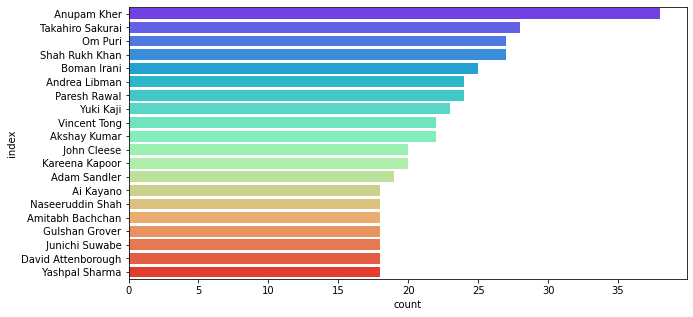

In [28]:
#Plottng a bargraph for the above analysis
plt.figure(figsize=(10,5))
sns.barplot(y="index", x="count", data=cast_list_count.nlargest(20,['count']),palette="rainbow")

**Anupam Kher** is the actor with most number of productions with his name on the cast list.

In [29]:
#analysis on countries
countries_list = list(netflix_df['country'])
country_list =[x for xs in countries_list for x in xs.split(',')]
country_list = [i.strip() for i in country_list]
country_count = collections.Counter(country_list)

In [30]:
#Changing to dataframe
country_count = pd.DataFrame.from_dict(country_count, orient='index', columns=['count'])
country_count.reset_index(inplace=True)

In [31]:
#Renaming the columns for readability
country_count.rename(columns = {'index':'country'}, inplace = True)
country_count.reset_index(drop=True, inplace=True)

In [32]:
#Declaring two new columns for the count of tv shows and movies each
country_count["Number of TV Shows"] = ""
country_count["Number of Movies"] = ""

In [33]:
#Counting the number of shows and movies for each country
for i in range(len(country_count)):
  count_tv = 0
  count_movie = 0
  country_name = country_count.country[i]
  for j in range(len(netflix_df)):
    if((netflix_df['type'][j] == 'Movie') & (country_name in netflix_df['country'][j])):
      count_movie = count_movie + 1
    elif((netflix_df['type'][j] == 'TV Show') & (country_name in netflix_df['country'][j])):
      count_tv = count_tv + 1
  
  country_count["Number of TV Shows"][i] = count_tv
  country_count["Number of Movies"][i] = count_movie


In [34]:
#Top 10 records of the derived dataset
country_count.head(10)

,country,count,Number of TV Shows,Number of Movies
0,Brazil,88,29,59
1,Mexico,154,53,101
2,Singapore,39,21,18
3,United States,3804,1143,2661
4,Turkey,108,28,80
5,Egypt,110,13,97
6,India,990,75,915
7,Poland,36,8,28
8,Thailand,65,22,43
9,Nigeria,76,8,68


In [35]:
#Sort the dataset to see the toppers
country_count=country_count.sort_values('count',ascending=False)
index_names = country_count[ country_count['country'] == '' ].index
country_count.drop(index_names, inplace = True)
country_count.reset_index(inplace=True)

In [36]:
#Top 20 countries
top_countries=country_count.head(10)
top_countries = top_countries[top_countries['country']!='']
top_countries

,index,country,count,Number of TV Shows,Number of Movies
0,3,United States,3804,1143,2661
1,6,India,990,75,915
2,12,United Kingdom,723,256,467
3,16,Canada,412,126,286
4,21,France,349,84,265
5,13,Japan,287,184,103
6,19,Spain,215,57,158
7,14,South Korea,212,157,55
8,25,Germany,199,44,160
9,1,Mexico,154,53,101


**United States** has the most number of tv shows and movies as its origin country followed by **India and United Kingdom**.

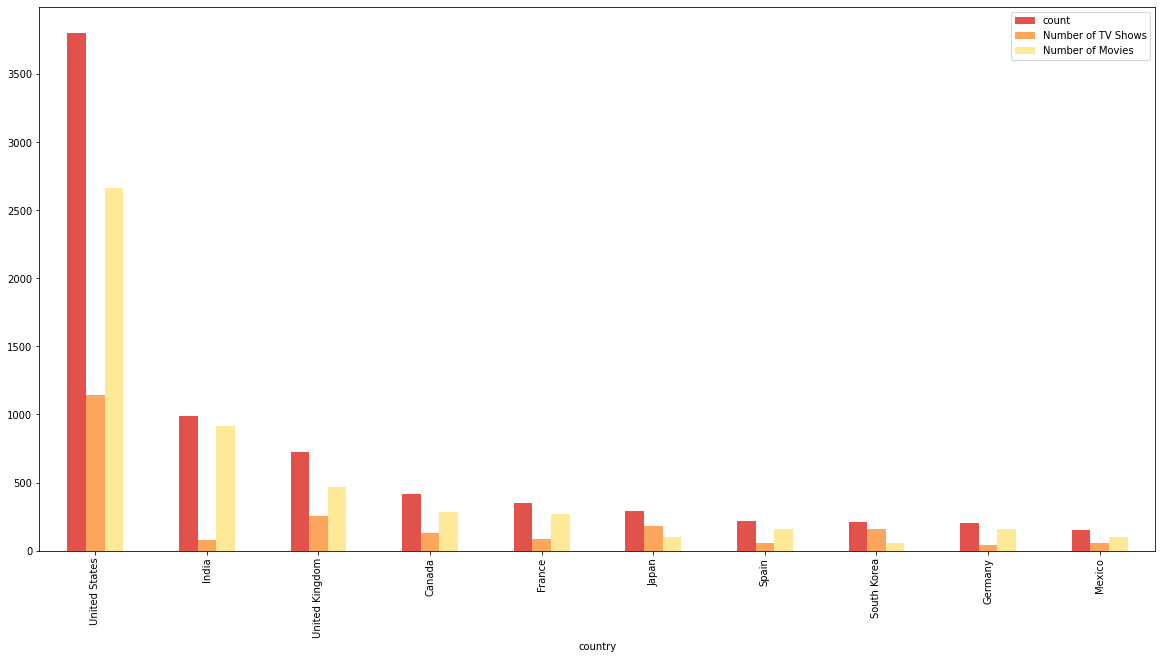

In [37]:
#Plotting a bargraph
top_countries.plot(x="country", y=['count','Number of TV Shows','Number of Movies'], kind="bar",figsize=(20,10))

In [38]:
#Analysis on release year
netflix_df["release_year"].value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

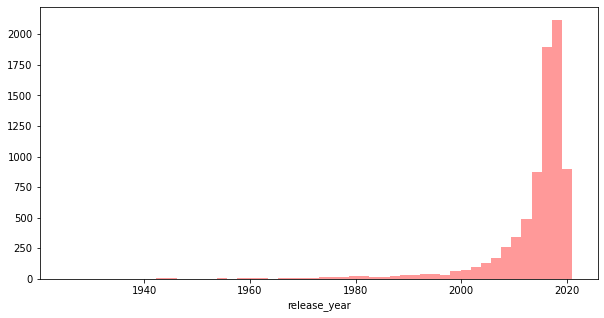

In [39]:
#overall year of release analysis
plt.figure(figsize=(10,5))
sns.distplot(netflix_df["release_year"],kde=False, color="red")

Netflix database has most movies which were released during the last decade **(2010 - 2020 )** compared to all other time periods.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

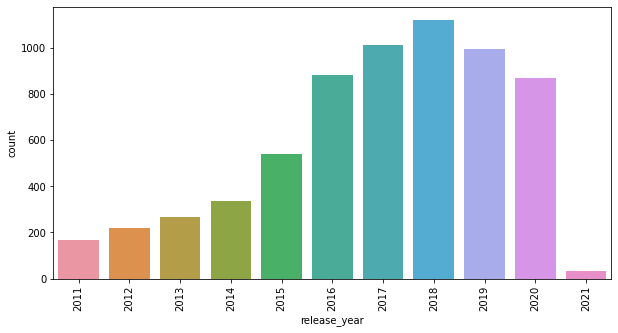

In [40]:
#Checking the trends from the year 2010
recent_years = netflix_df[netflix_df['release_year']>2010]

#overall year of release analysis
plt.figure(figsize=(10,5))
sns.countplot(recent_years["release_year"])
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'RATING')

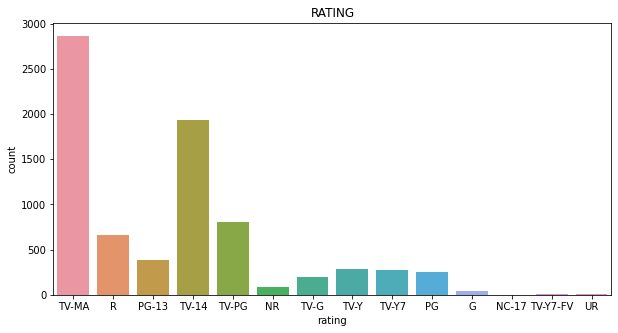

In [41]:
#Analysis on various ratings
plt.figure(figsize=(10,5))
sns.countplot(netflix_df['rating'])
plt.title('RATING')



*   TV-MA :- This program is intended to be viewed by mature, adult audiences and may be unsuitable for children under 17
*   R :- Restricted; Under 17 requires accompanying parent or adult guardian
*  PG-13 :- Parents strongly cautioned; Some material may be inappropriate for children 
*  TV-14 :- This program may be unsuitable for children under 14 years of age
*  TV-PG :- This program contains material that parents may find unsuitable for younger children; Parental guidance is recommended
*  NR :- If a film has not been submitted for a rating or is an uncut version of a film that was submitted, the labels Not Rated (NR) or Unrated (UR) are often used. 
*  TV-G :- This program is suitable for all ages
*   TV-Y :- This program is aimed at a very young audience, including children from ages 2–6
*   TV-Y7 :- This program is most appropriate for children age 7 and up.
*   PG :- Parental guidance suggested
*   G :- All ages admitted; General audiences.
*   NC-17 :- Adults Only; No One 17 and Under Admitted; Clearly adult; Children are not admitted
*   TV-Y7-FV :- Programming with fantasy violence that may be more intense or more combative than other programming in the TV-Y7 category
*  UR :- If a film has not been submitted for a rating or is an uncut version of a film that was submitted, the labels Not Rated (NR) or Unrated (UR) are often used. 


In [42]:
#Find the count of ratings
netflix_df["rating"].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [43]:
#Declaring two new columns for the count of tv shows and movies each
country_count["Units with TV-MA rating"] = ""
country_count["Units with R rating"] = ""
country_count["Units with PG-13 rating"] = ""
country_count["Units with TV-14 rating"] = ""
country_count["Units with TV-PG rating"] = ""
country_count["Units with NR rating"] = ""
country_count["Units with TV-G rating"] = ""
country_count["Units with TV-Y rating"] = ""
country_count["Units with TV-Y7 rating"] = ""
country_count["Units with PG rating"] = ""
country_count["Units with G rating"] = ""
country_count["Units with NC-17 rating"] = ""
country_count["Units with TV-Y7-FV rating"] = ""
country_count["Units with UR rating"] = ""

In [44]:
#Counting the number of shows and movies for each country
for i in range(len(country_count)):
  tv_ma_rat = 0
  tv_14_rat = 0
  tv_pg_rat = 0
  r_rat = 0
  pg_13_rat = 0
  tv_y_rat = 0
  tv_y7_rat = 0
  pg_rat = 0
  tv_g_rat = 0
  nr_rat = 0
  g_rat = 0
  tv_y7_fv_rat = 0
  ur_rat = 0
  nc_17_rat = 0
  
  country_name = country_count.country[i]
  for j in range(len(netflix_df)):
    if((netflix_df['rating'][j] == 'TV-MA') & (country_name in netflix_df['country'][j])):
      tv_ma_rat = tv_ma_rat + 1
    elif((netflix_df['rating'][j] == 'TV-14') & (country_name in netflix_df['country'][j])):
      tv_14_rat = tv_14_rat + 1
    elif((netflix_df['rating'][j] == 'TV-PG') & (country_name in netflix_df['country'][j])):
      tv_pg_rat = tv_pg_rat + 1
    elif((netflix_df['rating'][j] == 'R') & (country_name in netflix_df['country'][j])):
      r_rat = r_rat + 1
    elif((netflix_df['rating'][j] == 'PG-13') & (country_name in netflix_df['country'][j])):
      pg_13_rat = pg_13_rat + 1
    elif((netflix_df['rating'][j] == 'TV-Y') & (country_name in netflix_df['country'][j])):
      tv_y_rat = tv_y_rat + 1
    elif((netflix_df['rating'][j] == 'TV-Y7') & (country_name in netflix_df['country'][j])):
      tv_y7_rat = tv_y7_rat + 1
    elif((netflix_df['rating'][j] == 'PG') & (country_name in netflix_df['country'][j])):
      pg_rat = pg_rat + 1
    elif((netflix_df['rating'][j] == 'TV-G') & (country_name in netflix_df['country'][j])):
      tv_g_rat = tv_g_rat + 1
    elif((netflix_df['rating'][j] == 'NR') & (country_name in netflix_df['country'][j])):
      nr_rat = nr_rat + 1
    elif((netflix_df['rating'][j] == 'G') & (country_name in netflix_df['country'][j])):
      g_rat = g_rat + 1
    elif((netflix_df['rating'][j] == 'TV-Y7-FV') & (country_name in netflix_df['country'][j])):
      tv_y7_fv_rat = tv_y7_fv_rat + 1
    elif((netflix_df['rating'][j] == 'UR') & (country_name in netflix_df['country'][j])):
      ur_rat = ur_rat + 1
    elif((netflix_df['rating'][j] == 'NC-17') & (country_name in netflix_df['country'][j])):
      nc_17_rat = nc_17_rat + 1

  country_count["Units with TV-MA rating"][i] = tv_ma_rat
  country_count["Units with TV-14 rating"][i] = tv_14_rat
  country_count["Units with TV-PG rating"][i] = tv_pg_rat
  country_count["Units with R rating"][i] = r_rat
  country_count["Units with PG-13 rating"][i] = pg_13_rat
  country_count["Units with TV-Y rating"][i] = tv_y_rat
  country_count["Units with TV-Y7 rating"][i] = tv_y7_rat
  country_count["Units with PG rating"][i] = pg_rat
  country_count["Units with TV-G rating"][i] = tv_g_rat
  country_count["Units with NR rating"][i] = nr_rat
  country_count["Units with G rating"][i] = g_rat
  country_count["Units with TV-Y7-FV rating"][i] = tv_y7_fv_rat 
  country_count["Units with UR rating"][i] = ur_rat
  country_count["Units with NC-17 rating"][i] = nc_17_rat



In [45]:
#dropping the index column
country_count = country_count.drop(['index'], axis = 1)

In [46]:
# ratings details of the top 5 countries
country_count.head(5)

,country,count,Number of TV Shows,Number of Movies,Units with TV-MA rating,Units with R rating,Units with PG-13 rating,Units with TV-14 rating,Units with TV-PG rating,Units with NR rating,Units with TV-G rating,Units with TV-Y rating,Units with TV-Y7 rating,Units with PG rating,Units with G rating,Units with NC-17 rating,Units with TV-Y7-FV rating,Units with UR rating
0,United States,3804,1143,2661,1193,541,343,600,354,43,101,185,187,210,37,1,3,2
1,India,990,75,915,246,5,9,542,142,8,10,7,14,5,0,0,1,1
2,United Kingdom,723,256,467,237,120,66,97,95,12,23,27,11,31,3,0,0,1
3,Canada,412,126,286,100,68,28,47,39,5,17,45,35,23,2,1,1,1
4,France,349,84,265,152,49,22,43,11,4,6,18,21,18,2,1,0,2


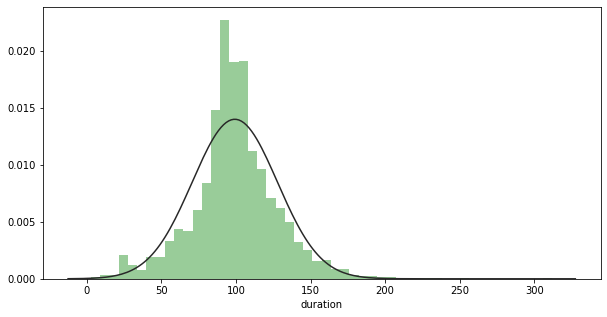

In [47]:
#analysis on the duration of the movies
duration_movie = netflix_df[netflix_df["type"] == "Movie"]['duration'].str.rstrip('min').astype('int')
plt.figure(figsize= (10, 5))
sns.distplot(duration_movie, fit = norm, kde = False, color = 'green')
plt.show()

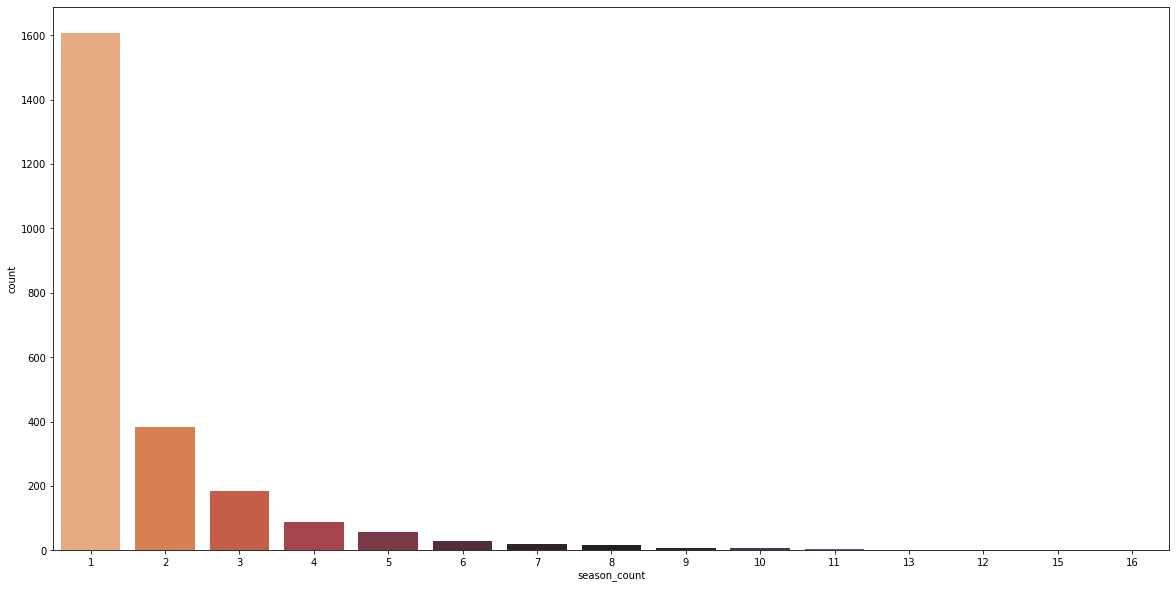

In [48]:
#analysis on the duration of the TV Shows
duration_show = netflix_df[netflix_df["type"] == "TV Show"]['season_count']
total = float(len(duration_show))
plt.figure(figsize= (20, 10))
ax = sns.countplot(x = duration_show, palette = 'icefire_r', order = duration_show.value_counts().index)
plt.show()

Most of the streamed TV Shows have only one season.Shows that go beyond 3 season are very less in number compared to single season TV Shows.
This statistic can change in the future as most of these were released in the years 2017 - 2020.

In [49]:
#count of netflix shows/movies with respect to the genres
netflix_df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

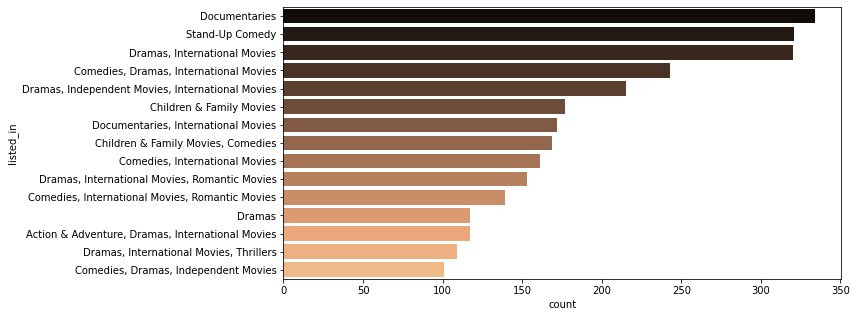

In [50]:
#Visualization of genre details of the dataset
plt.figure(figsize = (10, 5))
sns.countplot(data = netflix_df, y = 'listed_in', palette = 'copper', order = netflix_df[netflix_df['type'] == 'Movie']['listed_in'].value_counts().index[: 15])
plt.show()

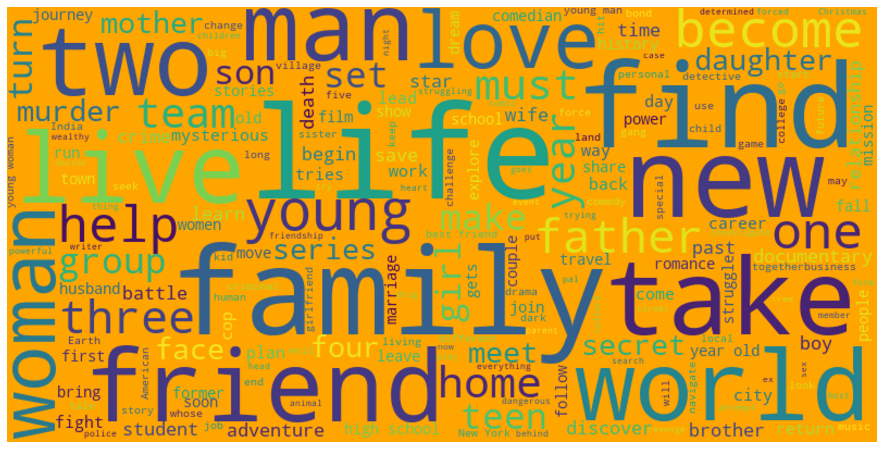

In [51]:
#Analysis on description column
plt.figure(figsize= (16, 8))
title_words = " ".join(word for word in netflix_df['description'])
stopwords = set(STOPWORDS)
# Generate a word cloud image
title_cloud = WordCloud(stopwords=stopwords, background_color="orange",width=800, height=400).generate(title_words)
plt.imshow(title_cloud, interpolation='mitchell')
plt.axis("off")
plt.show()

Family, life, world happens to most frequent word in the description of these netflix movies/shows.

In [52]:
#Function to find the most streamed content/genre in each country.Here we are checking these details for the top 5 countries.
import re
def genres_by_country(c):
    genres = []
    genres_list = []
    for i in netflix_df[netflix_df.country.str.contains(c, na=False)]['listed_in']:
        genre = re.split(r', \s*', i)
        genres.append(genre)
    
    for sublist in genres:
      for item in sublist:
        genres_list.append(item.strip())
    
    
    return genres_list


In [53]:
country_count.head()

,country,count,Number of TV Shows,Number of Movies,Units with TV-MA rating,Units with R rating,Units with PG-13 rating,Units with TV-14 rating,Units with TV-PG rating,Units with NR rating,Units with TV-G rating,Units with TV-Y rating,Units with TV-Y7 rating,Units with PG rating,Units with G rating,Units with NC-17 rating,Units with TV-Y7-FV rating,Units with UR rating
0,United States,3804,1143,2661,1193,541,343,600,354,43,101,185,187,210,37,1,3,2
1,India,990,75,915,246,5,9,542,142,8,10,7,14,5,0,0,1,1
2,United Kingdom,723,256,467,237,120,66,97,95,12,23,27,11,31,3,0,0,1
3,Canada,412,126,286,100,68,28,47,39,5,17,45,35,23,2,1,1,1
4,France,349,84,265,152,49,22,43,11,4,6,18,21,18,2,1,0,2


In [54]:
top_countries_netflix = country_count["country"][:5]

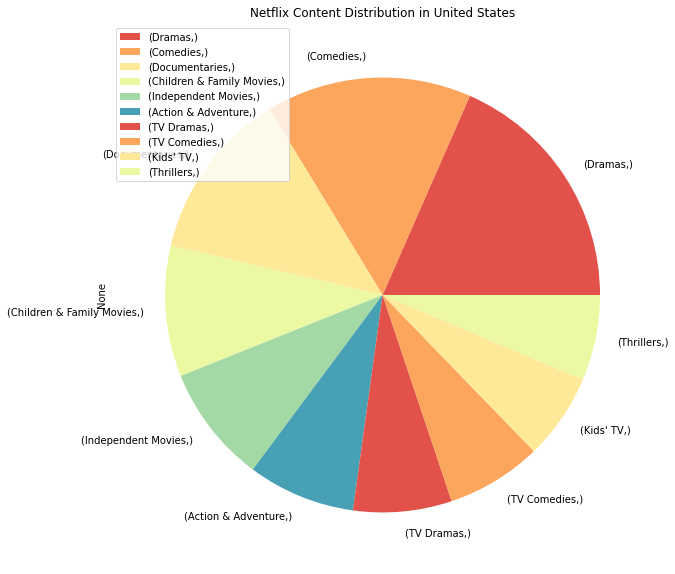

<Figure size 432x288 with 0 Axes>

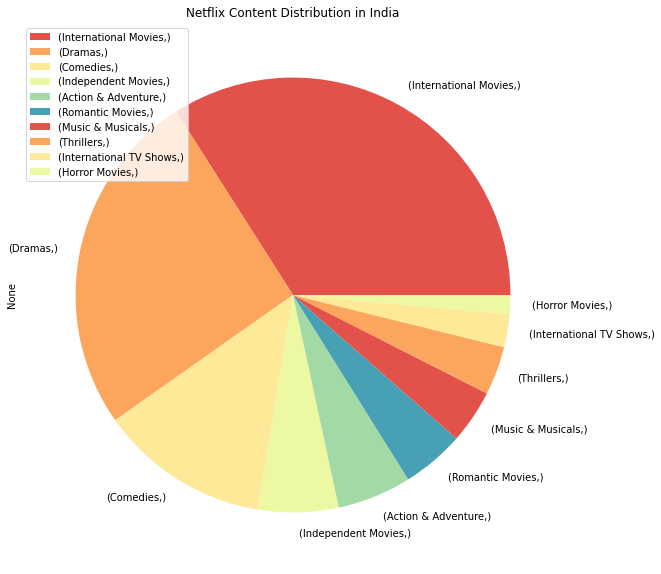

<Figure size 432x288 with 0 Axes>

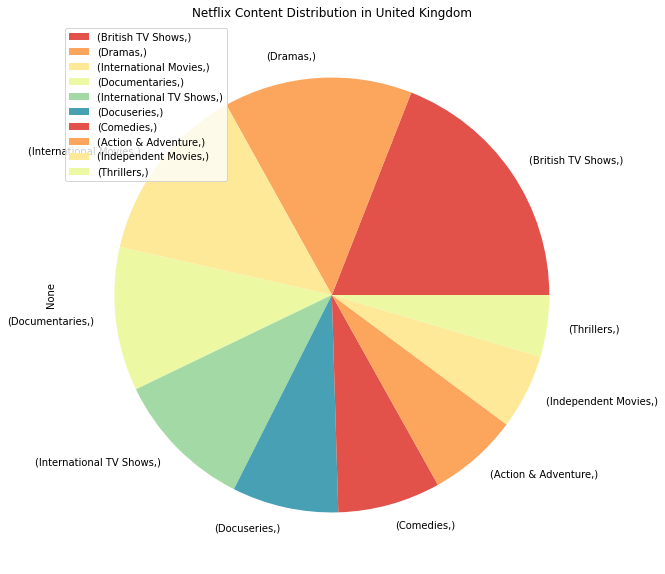

<Figure size 432x288 with 0 Axes>

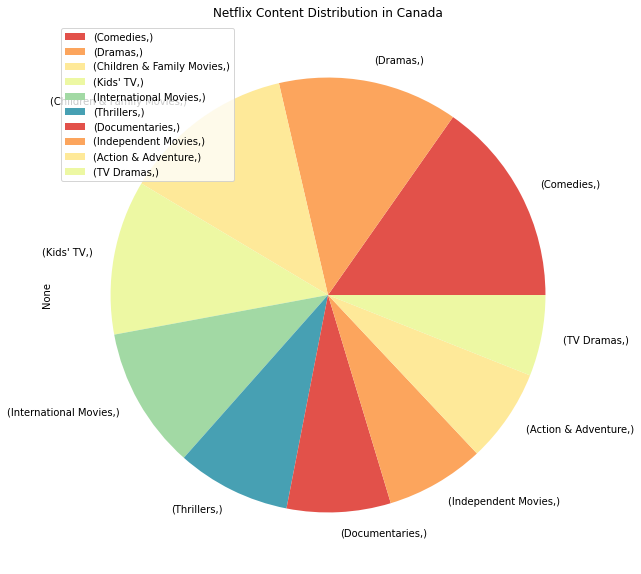

<Figure size 432x288 with 0 Axes>

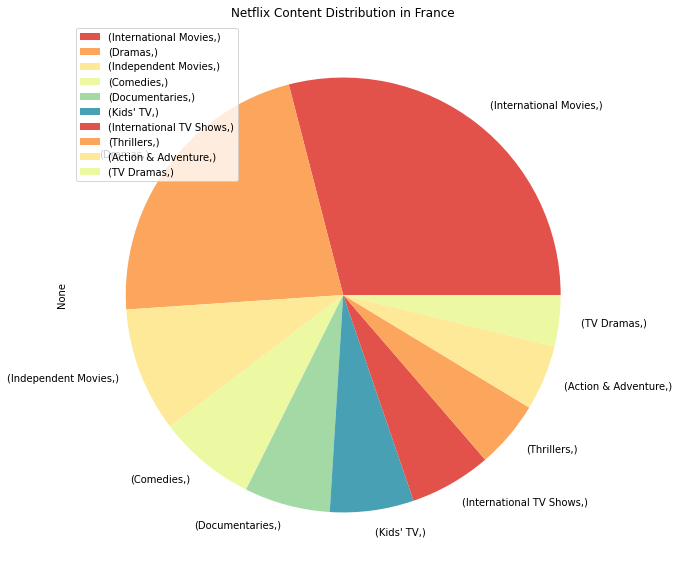

<Figure size 432x288 with 0 Axes>

In [55]:
for i in range(len(top_countries_netflix)):
  name_country = top_countries_netflix [i]
  new_df = pd.DataFrame(genres_by_country(name_country)).value_counts()
  plt.figure(figsize = (20, 10))
  new_df.nlargest(10).plot.pie(title="Netflix Content Distribution in "+name_country)
  plt.legend(loc='upper left', fontsize=10)
  plt.show()
  plt.tight_layout()
  



*   United States streams mostly Dramas and Comedies.
*   India streams streams mostly International movies and Dramas.
*   United Kingdom streams mostly British TV Shows and Dramas.
*   Canada streams Comedies and Dramas the most.
*   France mostly streams International movies and Dramas.

## **HYPOTHESIS TESTING**


Our problem statement quotes : "In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled."

Let's put this theory to test.

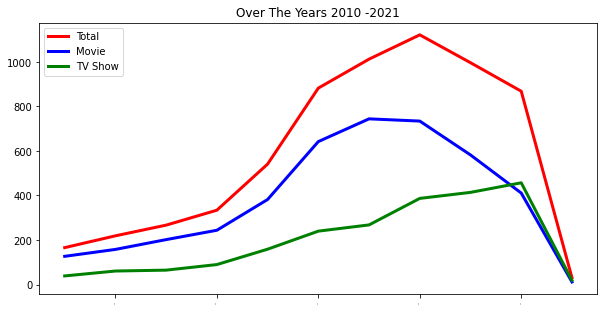

In [56]:
#Visualize the growth of netflix industry over the years

year_data = recent_years['release_year'].value_counts().sort_index().loc[:2021]
type_data = recent_years.groupby('release_year')['type'].value_counts().unstack().loc[:2021]

fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(year_data.index,year_data, color = 'red', linewidth=3, label='Total')
ax.plot(type_data.index, type_data['Movie'], color='blue', linewidth=3, label='Movie')
ax.plot(type_data.index, type_data['TV Show'], color='green', linewidth=3, label='TV Show')

ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=0)

ax.set_title('Over The Years 2010 -2021')

plt.xticks(rotation = 90)
plt.legend(loc='upper left')

Above graph is the representation of the movies/shows in the netflix dataset with respect to it released year.This shows the number of netflix production and their year of release.This doesnt explain whether netflix had them when the productions were released. But we can use the year_added column for this information.

In [57]:
#Checking the trends from the year 2010
recent_years_added = netflix_df[netflix_df['year_added']>2010]

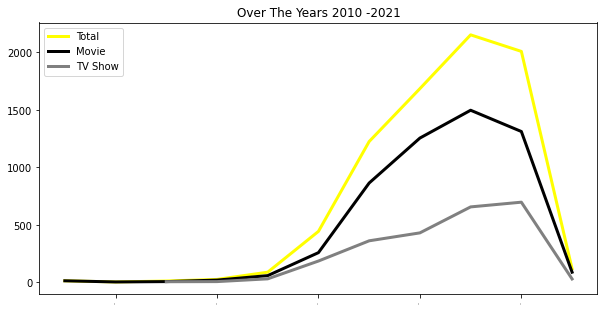

In [58]:
#Visualize the growth of netflix industry over the years

year_data = recent_years_added['year_added'].value_counts().sort_index().loc[:2021]
type_data = recent_years_added.groupby('year_added')['type'].value_counts().unstack().loc[:2021]

fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(year_data.index,year_data, color = 'yellow', linewidth=3, label='Total')
ax.plot(type_data.index, type_data['Movie'], color='black', linewidth=3, label='Movie')
ax.plot(type_data.index, type_data['TV Show'], color='grey', linewidth=3, label='TV Show')

ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=0)

ax.set_title('Over The Years 2010 -2021')

plt.xticks(rotation = 90)
plt.legend(loc='upper left')

We can see that there is a steady decline of production irrespective of the type (movie or show). This could be because the dataset include details of the year 2021 which is the ongoing year.So this year has to be excluded for our testing.

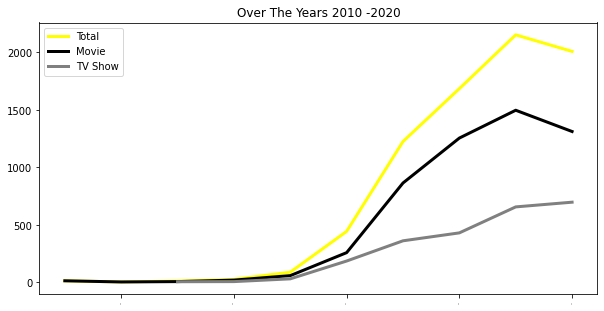

In [59]:
#Visualize the growth of netflix industry over the years

year_data = recent_years_added['year_added'].value_counts().sort_index().loc[:2020]
type_data = recent_years_added.groupby('year_added')['type'].value_counts().unstack().loc[:2020]

fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(year_data.index,year_data, color = 'yellow', linewidth=3, label='Total')
ax.plot(type_data.index, type_data['Movie'], color='black', linewidth=3, label='Movie')
ax.plot(type_data.index, type_data['TV Show'], color='grey', linewidth=3, label='TV Show')

ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=0)

ax.set_title('Over The Years 2010 -2020')

plt.xticks(rotation = 90)
plt.legend(loc='upper left')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

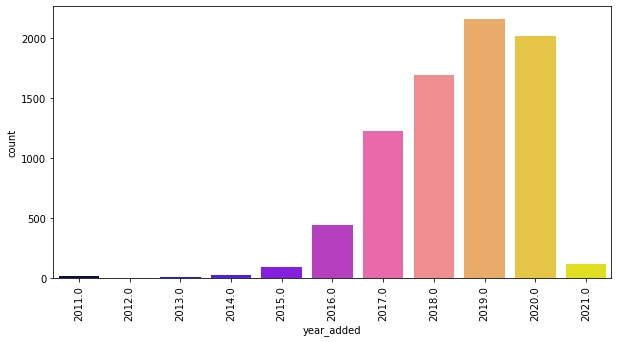

In [60]:
#overall year of release analysis
plt.figure(figsize=(10,5))
sns.countplot(recent_years_added["year_added"],palette = 'gnuplot2')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

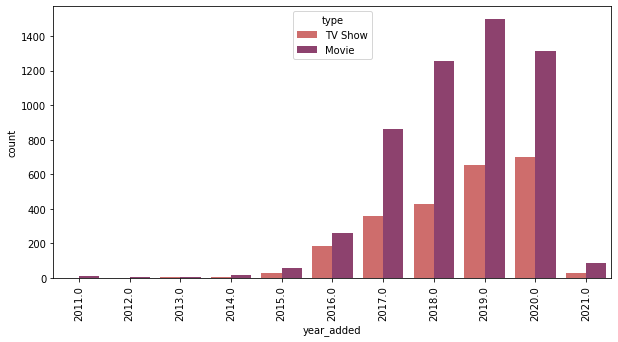

In [61]:
#overall year_added analysis
plt.figure(figsize=(10,5))
sns.countplot(recent_years_added["year_added"],hue=recent_years_added["type"],palette = 'flare')
plt.xticks(rotation = 90)

Irrespective of the release years, Netflix has distribution rights for the most number of shows and movies is in the year 2019. Also, there is no decline in the number of movies.Also number if movies added has always been more than the number of tv shows added.Compared the number of tv shows streamed in the year 2010, there is steady increase in the number of tv shows streamed in the year 2019.

In [62]:
 #count of tv shows streamed during th eyears 2010 to 2021
 recent_years_added_tv = recent_years_added[recent_years_added['type'] == 'TV Show']
 recent_years_added_tv.year_added.value_counts()

2020.0    697
2019.0    656
2018.0    430
2017.0    361
2016.0    185
2015.0     30
2021.0     29
2014.0      6
2013.0      5
Name: year_added, dtype: int64

**HYPOTHESIS**:The number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled.

**INFERENCE** : As seen above, the number of TV shows has tripled since 2010. But there is no decline in the number of movies streamed.
So we can conclude that the above hypothesis is rejected though partially true.

# **TEXT CLEANING AND FEATURE ENGINEERING**

# **Encoding the categorical data**


**First, we transform column data to a list so that we can do suitable actions in columns. Then we find the unique cast, directors, and genres for these columns.**

In [63]:
#dataset copied for clustering
df = netflix_original.copy()

In [64]:
# Replacing the values where the director is null with appropriate strings
df["director"] = df["director"].fillna("")
df["cast"] = df["cast"].fillna("")
df["country"] = df["country"].fillna("United States")
df["date_added"] = df["date_added"].fillna("")
df["rating"] = df["rating"].fillna("")

In [65]:
#Taking the primary country into account for each record and not the others
df.country = df.country.str.split(',')
df.loc[:, 'country'] = df.country.map(lambda x: x[0])

In [66]:
#Taking the primary director into account for each record and not the others
df.director = df.director.str.split(',')
df.loc[:, 'director'] = df.director.map(lambda x: x[0])

In [67]:
#Taking the primary cast member into account for each record and not the others
df.cast = df.cast.str.split(',')
df.loc[:, 'cast'] = df.cast.map(lambda x: x[0])

In [68]:
#Combine the above featured for vectorization
df["combined_text_feat"] = df['listed_in'].astype(str) + " " + df['description'].astype(str) + " " + df['type'].astype(str) + " "  + df['country'].astype(str) + " " + df['cast'].astype(str) + " " + df['rating'].astype(str)

In [69]:
from nltk.stem import PorterStemmer

import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

stemmer = PorterStemmer()
# Cleaning the text
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(inp_str):

    # Lowercase text
    inp_str = inp_str.lower() 

    # Replace REPLACE_BY_SPACE_RE symbols by space in text
    inp_str = REPLACE_BY_SPACE_RE.sub(' ', inp_str) 
    
    # Remove the XXXX values
    inp_str = inp_str.replace('x', '') 
    
    # Remove white space
    inp_str = REMOVE_NUM.sub('', inp_str)

    # Remove symbols which are in BAD_SYMBOLS_RE from text
    inp_str = BAD_SYMBOLS_RE.sub('', inp_str) 

    # Remove stopwords from text
    inp_str = ' '.join(word for word in inp_str.split() if word not in STOPWORDS) 
    
    # Remove any words composed of less than 2 or more than 21 letters
    inp_str = ' '.join(word for word in inp_str.split() if (len(word) >= 2 and len(word) <= 21))

    # Stemming the words
    inp_str = ' '.join([stemmer.stem(word) for word in inp_str.split()])
    
    return inp_str

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [70]:
#applying the clean text funtion to the combined feature column for cleanup
df["combined_text_feat"] = df["combined_text_feat"].apply(clean_text)
df["combined_text_feat"]

0       intern tv show tv drama tv scifi fantasi futur...
1       drama intern movi devast earthquak hit meico c...
2       horror movi intern movi armi recruit found dea...
3       action adventur independ movi scifi fantasi po...
4       drama brilliant group student becom cardcount ...
                              ...                        
7782    drama intern movi lebanon civil war depriv zoz...
7783    drama intern movi music music scrappi poor boy...
7784    documentari intern movi music music documentar...
7785    intern tv show realiti tv dessert wizard adria...
7786    documentari music music documentari delv mysti...
Name: combined_text_feat, Length: 7787, dtype: object

In [71]:
# Run TF IDF Vectorizer on the text data
from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features

vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_vc = vectorizer.fit_transform(df["combined_text_feat"])

pd.DataFrame(X_vc.toarray(), columns=vectorizer.get_feature_names()).head()## **TEXT BASED CLUSTERING**

,aamir,aamir khan,aaron,abandon,abduct,abil,aboard,abraham,absurd,abus,...,young son,young woman,young women,younger,youth,zach,zani,zealand,zoe,zombi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **TEXT BASED CLUSTERING**

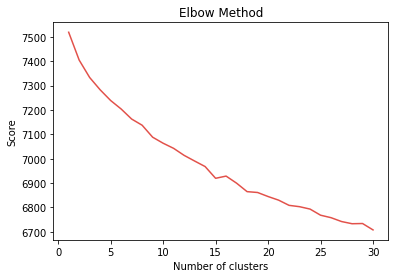

In [72]:
#Performing the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

score = []
for i in range(1,31):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(X_vc)
    score.append(kmeans.inertia_)
plt.plot(range(1,31 ),score)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

plt.show()

In [73]:
#Finding the optimal number of cluster using silhoutte method
from sklearn.metrics import silhouette_score
for n in range(2,30):
    clusterer = KMeans(n_clusters=n)
    preds = clusterer.fit_predict(X_vc)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_vc, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n, score))

For n_clusters = 2, silhouette score is 0.014787893887354207
For n_clusters = 3, silhouette score is 0.016159572210558245
For n_clusters = 4, silhouette score is 0.016546247708770466
For n_clusters = 5, silhouette score is 0.014411806228019866
For n_clusters = 6, silhouette score is 0.018168276930148625
For n_clusters = 7, silhouette score is 0.020664675154589023
For n_clusters = 8, silhouette score is 0.018756718696163598
For n_clusters = 9, silhouette score is 0.021452167421328834
For n_clusters = 10, silhouette score is 0.02112522113749673
For n_clusters = 11, silhouette score is 0.022270565063347784
For n_clusters = 12, silhouette score is 0.0244524091198317
For n_clusters = 13, silhouette score is 0.025045835819429655
For n_clusters = 14, silhouette score is 0.02621663937849523
For n_clusters = 15, silhouette score is 0.025005362999784772
For n_clusters = 16, silhouette score is 0.026670508507958303
For n_clusters = 17, silhouette score is 0.02701206236919872
For n_clusters = 18, 

In [74]:
k_clusters = 25

In [75]:
#Clustering the dataset with the optimal number of clusters
model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(X_vc)

KMeans(max_iter=600, n_clusters=25, random_state=0, tol=1e-06)

In [76]:
#Predict the clusters and evaluate the silhouette score
clusters = model.predict(X_vc)
score = silhouette_score(X_vc, clusters)
print("Silhouette score is {}".format(score))

Silhouette score is 0.027217317155321205


In [77]:
#Adding a seperate column for the cluster
df["Cluster Label"] = clusters
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined_text_feat,Cluster Label
0,s1,TV Show,3%,,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,intern tv show tv drama tv scifi fantasi futur...,9
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,drama intern movi devast earthquak hit meico c...,6
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",horror movi intern movi armi recruit found dea...,0
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",action adventur independ movi scifi fantasi po...,9
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,drama brilliant group student becom cardcount ...,23


## **DIMENSIONALITY REDUCTION**

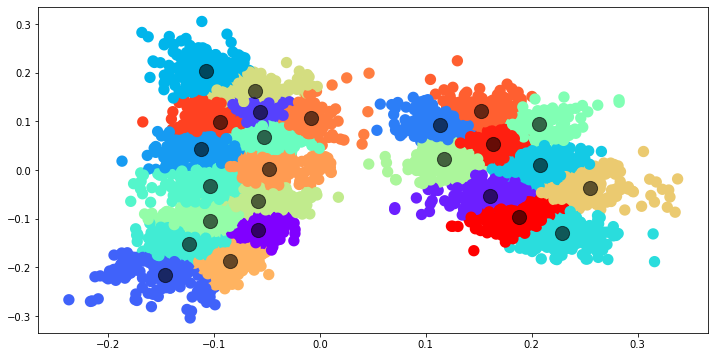

In [78]:
#Applying PCA for dimenstionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
y = pca.fit_transform(X_vc.toarray())
kmeans = KMeans(n_clusters=k_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(y)
y_pred = kmeans.predict(y)

plt.figure(figsize=(12, 6))
plt.scatter(y[:, 0], y[:, 1], c=y_pred, s=40, cmap='rainbow', linewidths=5)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6);

In [79]:
#Predict the clusters and evaluate the silhouette score
score = silhouette_score(y, y_pred)
print("Silhouette score is {}".format(score))

Silhouette score is 0.35209271174994206


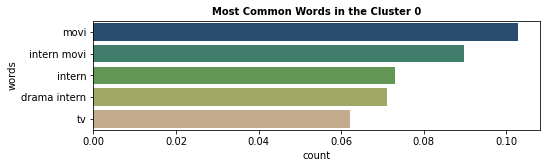

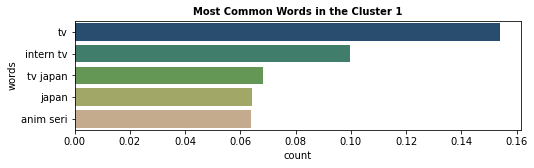

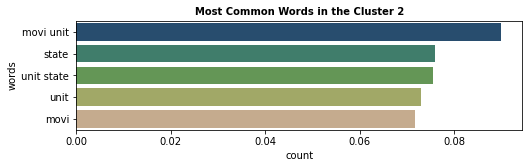

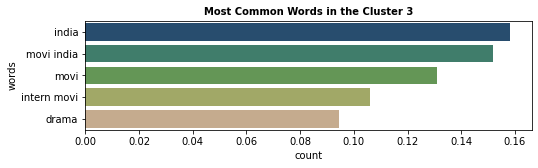

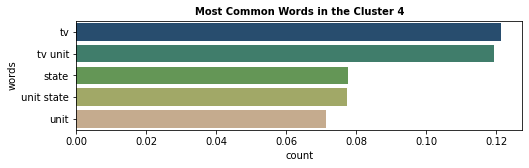

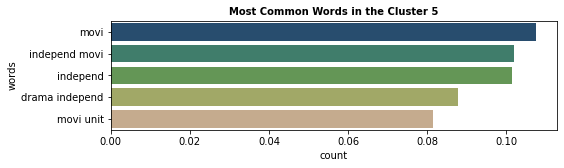

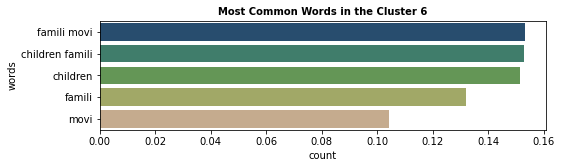

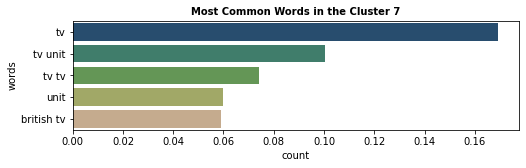

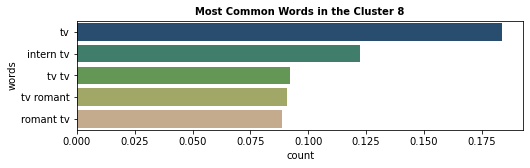

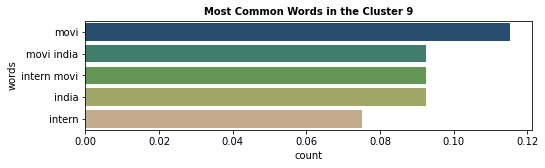

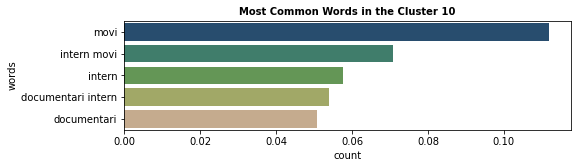

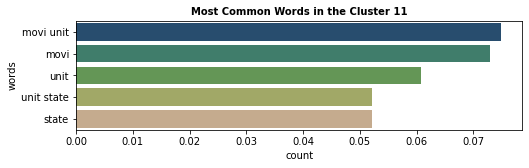

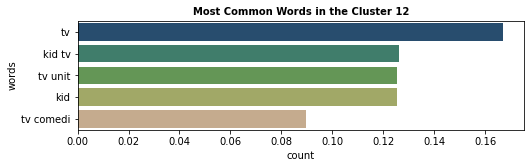

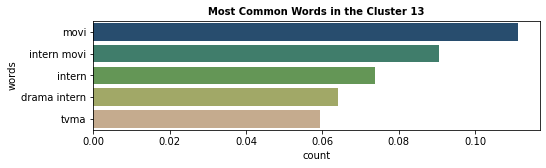

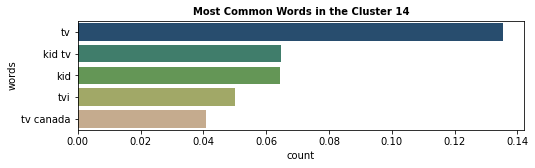

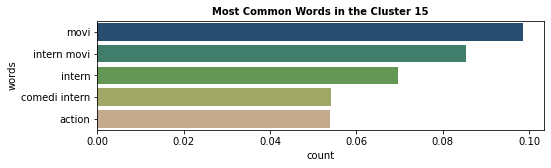

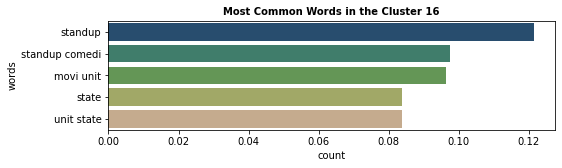

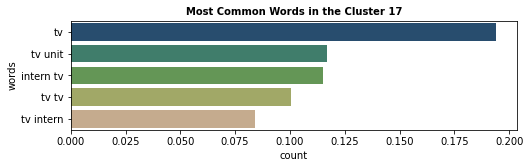

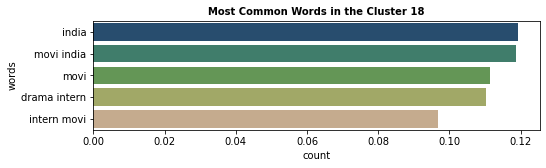

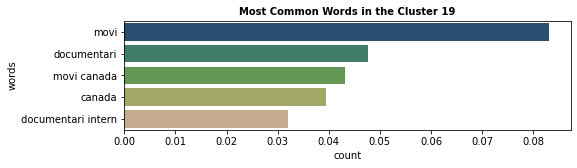

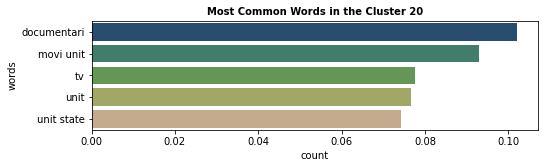

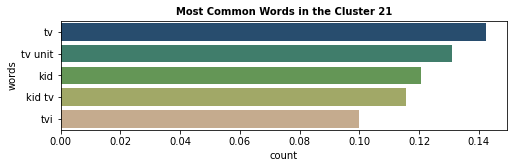

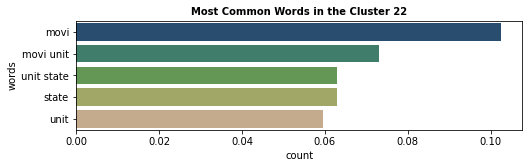

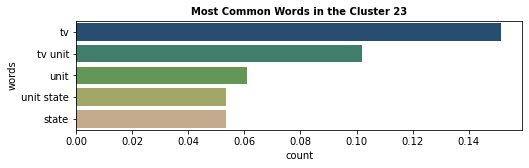

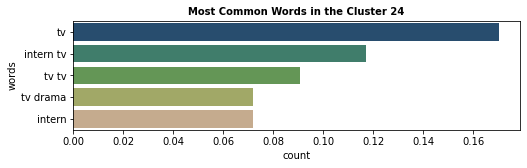

In [80]:
#Function for getting the most common words in each cluster
def get_common_words_cluster(vc_arr, y_pred, n_feats):
    labels = np.unique(y_pred)
    dfs = []
    for label in labels:
      # indices for each cluster
      id_temp = np.where(y_pred==label)
      # returns average score across cluster 
      x_means = np.mean(vc_arr[id_temp], axis = 0) 
      # indices with top 20 scores
      sorted_means = np.argsort(x_means)[::-1][:n_feats] 
      features = vectorizer.get_feature_names()
      common_words = [(features[i], x_means[i]) for i in sorted_means]
      df = pd.DataFrame(common_words, columns = ['words', 'count'])
      dfs.append(df)
    return dfs

#Function for data visualization of the most commin words in each cluster
def plot_common_words(dfs, num):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(8, 2))
        plt.title(("Most Common Words in the Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'count' , y = 'words', orient = 'h' , data = dfs[i][:num],palette = 'gist_earth')

dfs = get_common_words_cluster(X_vc.toarray(), y_pred, 5)
plot_common_words(dfs, 5)

In [82]:
#to understand the difference between each clusters
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()
for i in range(k_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :k_clusters]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Cluster 0: horror movi horror movi movi intern movi thriller thriller movi unit movi independ tvma unit state unit state intern movi intern comedi horror independ independ movi haunt hous home young spirit woman movi india india
Cluster 1: anim seri tv japan japan anim seri seri intern tv intern tv intern tvma seri kid world young seri crime human teen tv tv teen school teen battl kid high fight girl forc
Cluster 2: tv romant tv tv romant romant tv tv intern tv tv drama tv comedi intern taiwan tv taiwan love drama tv unit comedi tvma unit unit state state tv china life romanc woman china meet
Cluster 3: music movi music music music movi movi india india intern movi intern comedi intern drama intern tv comedi love drama tvpg kapoor khan famili man woman fall kapoor tv kumar friend khan tv
Cluster 4: music music music documentari documentari music movi movi unit movi music unit unit state state tvma band perform documentari intern concert drama music music documentari tour icon rock unit

In [83]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined_text_feat,Cluster Label
0,s1,TV Show,3%,,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,intern tv show tv drama tv scifi fantasi futur...,9
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,drama intern movi devast earthquak hit meico c...,6
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",horror movi intern movi armi recruit found dea...,0
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",action adventur independ movi scifi fantasi po...,9
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,drama brilliant group student becom cardcount ...,23
5,s6,TV Show,46,Serdar Akar,Erdal Beşikçioğlu,Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,intern tv show tv drama tv mysteri genet profe...,13
6,s7,Movie,122,Yasir Al Yasiri,Amina Khalil,Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",horror movi intern movi aw accid coupl admit g...,0
7,s8,Movie,187,Kevin Reynolds,Samuel L. Jackson,United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...,drama one high school student attack dedic tea...,23
8,s9,Movie,706,Shravan Kumar,Divya Dutta,India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",horror movi intern movi doctor goe miss psychi...,0
9,s10,Movie,1920,Vikram Bhatt,Rajneesh Duggal,India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,horror movi intern movi thriller architect wif...,0


In [84]:
df['cluster'] = kmeans.labels_
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined_text_feat,Cluster Label,cluster
0,s1,TV Show,3%,,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,intern tv show tv drama tv scifi fantasi futur...,9,1
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,drama intern movi devast earthquak hit meico c...,6,15
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",horror movi intern movi armi recruit found dea...,0,15
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",action adventur independ movi scifi fantasi po...,9,22
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,drama brilliant group student becom cardcount ...,23,2


In [85]:
#Function for getting the some of the same cluster item details
def find_same_cluster_items(name_nf):
  inp_nf = df.loc[df['title'].str.lower() == name_nf.lower()]
  num = inp_nf.cluster.iloc[0]
  type_nf = inp_nf.type.iloc[0]
  temp_df = df.loc[(df['cluster'] == num) & (df['type']==type_nf)]
  temp_df = temp_df.sample(10)
  print("The cluster number is {}".format(num))
   #print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
  return list(temp_df['title'])


In [86]:
find_same_cluster_items('zodiac')

The cluster number is 11


['Franco Escamilla: Por la anécdota',
 'One Last Thing',
 'The Meaning of Monty Python',
 'Boy Bye',
 'Chasing Amy',
 'Sex Drive',
 'Hold the Dark',
 'Victor',
 'Elstree 1976',
 'A Kind of Murder']

In [87]:
find_same_cluster_items('Dear Zindagi')

The cluster number is 18


['This Earth of Mankind',
 'Kaabil',
 'Phir Se',
 'We Are Family',
 'Aşk Tesadüfleri Sever',
 'Hot Sweet Sour',
 'Raja Hindustani',
 'Chance Pe Dance',
 'Genius',
 'Dear Zindagi']

In [88]:
find_same_cluster_items('The good place')

The cluster number is 23


['Ash vs. Evil Dead',
 'Glitter Force',
 'Haunted House',
 'Polly Pocket',
 'Mia and Me',
 'Dinosaur King',
 'The Blue Planet: A Natural History of the Oceans',
 'Evil',
 'Killer Inside: The Mind of Aaron Hernandez',
 "Dragon's Dogma"]

## **RECOMMENDATION**

In [89]:
from sklearn.metrics.pairwise import linear_kernel

#compute the cosine similarity matrix 
cosine_sim= linear_kernel(X_vc,X_vc)

In [90]:
#Series for getting the index and title
indices = pd.Series(df.index,index=df['title']).drop_duplicates()

In [91]:
def get_recommendations(title, cosine_sim = cosine_sim):

    #get index of the matching title
    idx=indices[title]

    #get the similarity score of the similar titles
    sim_scores=list(enumerate(cosine_sim[idx]))

    #sort the movies based on the similarity score
    sim_scores=sorted(sim_scores, key=lambda x:x[1], reverse=True)

    #get the similarity score of top 10 movies
    sim_scores=sim_scores[1:11]

    #get the indices 
    movie_indices = [i[0] for i in sim_scores]
    
    #return the top indices
    return df['title'].iloc[movie_indices]

In [92]:
get_recommendations('Stranger Things')

2697                     Hemlock Grove
4470                       Nightflyers
6715                            The OA
1338    Chilling Adventures of Sabrina
6056                          The 4400
2687                             Helix
6958              The Umbrella Academy
7484                       Warrior Nun
468              American Horror Story
6440        The Haunting of Hill House
Name: title, dtype: object

In [93]:
get_recommendations('Kapoor & Sons')

1429    Club de Cuervos Presents: I, Potro
3675                         Little Sister
2200                                  Fiza
5376                                Sangam
753                                 Barfi!
1016                                 Bobby
7030                       The Zoya Factor
6086                      The Ant's Scream
1937                      Ek Jaan Hain Hum
105                    300 Miles to Heaven
Name: title, dtype: object

In [94]:
get_recommendations('Click')

522                          Anger Management
3666                             Little Nicky
6990                             The Waterboy
2829    Hotel Transylvania 3: Summer Vacation
4250                                Mr. Deeds
901                                 Big Daddy
802                           Bedtime Stories
2855                          Hubie Halloween
121                            50 First Dates
307                   ADAM SANDLER 100% FRESH
Name: title, dtype: object

## **CONCLUSION**

Netflix has more movies than TV Shows

United States provides the most number of movies and shows followed by India and United Kingdom.

TV-MA rated content is maximum in number in the dataset. This rating indicates that the content is for mature and adult audience above the age of 17.

There is an exponential raise in the number of TV shows and movies distributed by Netflix in the recent years.

Text cleaning and vectorization was done on the combined features of the dataset which includes origin country, leading cast member, rating type, content type and description for clustering analysis.

Optimal number of clusters were found out to be 25 with silhouette coefficient value of 0.0279

Principal component analysis was performed inorder to reduce the higher dimensionality which improved the silhouette coefficient to 0.35. Even though there's improvement in the silhouette score, these cannot be compared as these are two different method of preprocessing is involved.

Clusters are identified for each of the record in the dataset.

Recommendation based on cosine similiarity is also done on the same transformed data.